In [1]:
from utils import *
from models.models import *
import matplotlib.pyplot as plt

In [2]:
ensure_reproducibility(42)

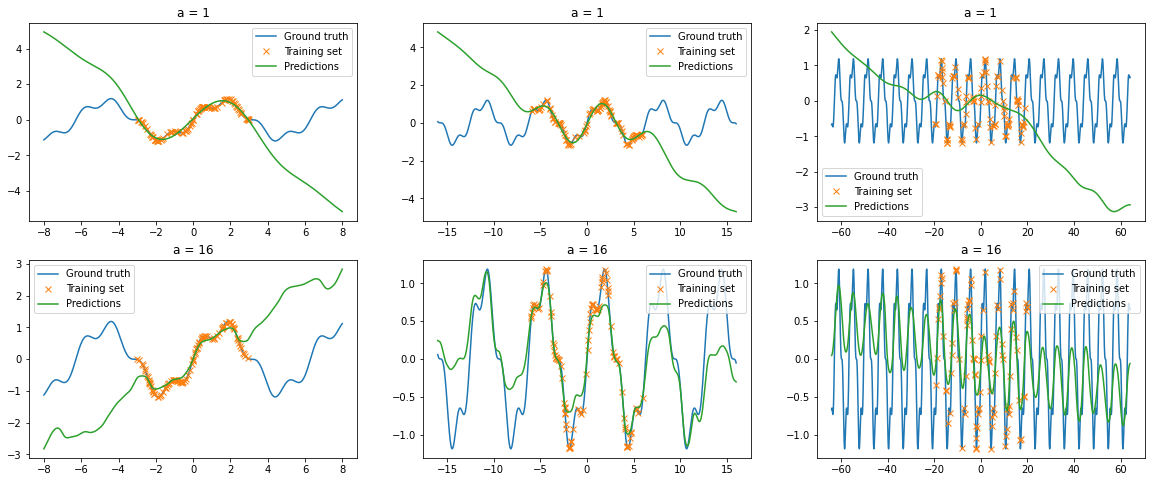

In [3]:
dataset_bounds = [(-8, 8), (-16, 16), (-64, 64)]
sample_bounds = [(-3, 3), (-6, 6), (-20, 20)]
a_values = [1, 16]

fig, ax = plt.subplots(nrows=2, ncols=3)
fig.set_figheight(8)
fig.set_figwidth(20)

for i, a_val in enumerate(a_values):
    for j, (db, sb) in enumerate(zip(dataset_bounds, sample_bounds)):
        x, y = gen_func_dataset(*db, "sinusoid")
        train_x, train_y = sample_func_dataset(x, y, *sb, num_points=100)
        model = SimpleMLP((1, 64, 64, 1), "snake_a="+str(a_val))
        model, losses = train_sinusoid(model, train_x/sb[1], train_y, 200, verbose=False)
        
        with torch.no_grad():
            model.cpu()
            preds = model(x/sb[1])

        ax[i, j].plot(x, y, label="Ground truth")
        ax[i, j].plot(train_x, train_y, 'x', label="Training set")
        ax[i, j].plot(x, preds, label="Predictions")
        ax[i, j].legend()
        ax[i, j].set_title("a = "+str(a_val))